In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as pex
import tensorflow as tf
import re
import math
import joblib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hipparcos-star-catalog/hipparcos-voidmain.csv
/kaggle/input/star-dataset/6 class csv.csv


In [2]:
Hipparcos = pd.read_csv("/kaggle/input/hipparcos-star-catalog/hipparcos-voidmain.csv")
data_star = pd.read_csv("/kaggle/input/hipparcos-star-catalog/hipparcos-voidmain.csv")
data_star2 = pd.read_csv("/kaggle/input/star-dataset/6 class csv.csv")

# Clasificacion de Estrellas

Las estrellas son cuerpos celestes de gran importancia en el universo, ya que
emiten luz y calor que es esencial para la vida en nuestro planeta. Son el
resultado de la fusion nuclear de hidrogeno en sus nucleos, lo que genera una
gran cantidad de energia. La clasificacion de estrellas se basa en su temperatura
superficial y su luminosidad. Esto se refleja en su color y tamaño. Una forma
de clasificar las estrellas es mediante la secuencia estelar de Hertzsprung-Russell, tambien conocida como el ”diagrama Hertzprung-Russell”. En este diagrama, las estrellas se clasifican en funcion de su temperatura superficial y su luminosidad, lo que permite determinar su posicion en la secuencia estelar.

### 1.1 Magnitud absoluta

La magnitud absoluta de una estrella es una medida de su brillo intrínseco, es decir, su brillo verdadero independientemente de su distancia a nosotros. Se utiliza para comparar la luminosidad de diferentes estrellas. La magnitud absoluta se mide en una escala logarítmica inversa, de tal manera que una estrella de magnitud absoluta -1 es 100 veces más luminosa que una estrella de magnitud absoluta 1. Esto significa que a medida que el número de magnitud absoluta aumenta, la estrella se vuelve menos brillante. Por ejemplo, una estrella con una magnitud absoluta de -1 es más brillante que una estrella con una magnitud absoluta de 1.

La escala de magnitud absoluta se basa en la idea de que la diferencia de una magnitud es igual a 2.512 veces la diferencia de luminosidad, es decir, una estrella con una magnitud absoluta de -1 es 2.512 veces más brillante que una estrella con una magnitud absoluta de 0.

La magnitud absoluta se calcula a partir de la magnitud aparente (la medida de la brillantez de una estrella tal y como es observado desde la Tierra) y la distancia de la estrella. Esto permite comparar la luminosidad de estrellas que están a diferentes distancias de la Tierra.

 A medida que la magnitud absoluta aumenta, la estrella se vuelve menos luminosa. La estrella más brillante conocida, Sirius, tiene una magnitud absoluta de -1.46.
Es importante mencionar que la magnitud aparente es la medida de la luz que llega a nosotros de una estrella, y esta puede variar dependiendo de la distancia a la estrella.

na estrella con una magnitud absoluta de -2 no es necesariamente 2512*2 veces más luminosa que una estrella con una magnitud absoluta de 0. Es importante recordar que la magnitud absoluta es una medida logarítmica, lo que significa que una diferencia de 5 magnitudes absolutas representa un factor de 100 en la luminosidad.

La magnitud aparente (m) se relaciona con la magnitud absoluta (M) a través de la fórmula:

$$M = m - 5 \log_{10} \left(\frac{d}{10}\right)$$

donde:
M es la magnitud aparente de la estrella
m es la magnitud absoluta de la estrella
d es la distancia a la estrella en unidades de parsec (pc)

donde "m" es la magnitud aparente, "d" es la distancia en parsecs y "log10" es el logaritmo en base 10.

La magnitud absoluta se refiere a la magnitud que tendría una estrella si estuviera a una distancia específica, generalmente 10 parsecs, es decir, esto se refiere a una magnitud intrínseca de una estrella, independiente de su distancia. Por otro lado, la magnitud aparente se refiere a la magnitud que se observa desde la Tierra, la cual puede variar dependiendo de la distancia de la estrella.

$$M = m - 5 \log_{10} (dpc) + 5 = m - 5 (\log_{10} (dpc) + 1)$$
 
El término 5x(log10(dpc)+1) se conoce como el módulo de distancia y se denota por μ. Por lo tanto, la magnitud absoluta de un objeto se podría escribir como.

$$M = m - \mu$$

### 1.2 Indice de Color (B-V)

El índice de color (B-V) es una medida de la diferencia de magnitud entre dos bandas del espectro electromagnético: el azul (B) y el verde (V). Se utiliza principalmente en astronomía para medir el color de las estrellas y determinar su temperatura efectiva. Un valor B-V más bajo indica una estrella más caliente (blanca o azulada) mientras que un valor más alto indica una estrella más fría (roja).


### 1.3 Graficando el modelo

1. calcular la distancia a un objeto celeste. 

para calcular la distancia a un objeto celeste utilizando la paralaje trigonométrica medida en milisegundos de arco (masa). La paralaje se expresa en segundos de arco (segunda) y para convertirla a milisegundos de arco se divide entre 1000. Los segundos de arco son una unidad de medida de ángulo utilizada en astronomía. Un segundo de arco es 1/3600 de un grado. Los segundos de arco son utilizados para medir las separaciones angulares entre objetos en el cielo, como la distancia angular entre dos estrellas cercanas o el tamaño angular de un planeta o una estrella.

En relación a la masa de las estrellas, los segundos de arco son utilizados para medir el tamaño angular de las estrellas en las estrellas binarias, estrellas que orbitan una alrededor de la otra. El tamaño angular de una estrella en un sistema binario, junto con la velocidad radial de la estrella, permite calcular la masa de la estrella.

Además, los segundos de arco también son utilizados en la medición de la paralaje estelar, que permite calcular la distancia a las estrellas cercanas. La paralaje estelar es el cambio en la posición aparente de una estrella debido a la oscilación de la posición de observación, causada por el movimiento orbital de la Tierra alrededor del Sol. La paralaje estelar se mide en segundos de arco, y su magnitud se utiliza para calcular la distancia a la estrella.


La paralaje estelar se utiliza para calcular la distancia de una estrella con respecto a la Tierra. La paralaje estelar es el cambio en la posición aparente de una estrella debido a la oscilación de la posición de observación, causada por el movimiento orbital de la Tierra alrededor del Sol. La paralaje estelar se mide en segundos de arco, y su magnitud se utiliza para calcular la distancia a la estrella.

Por ejemplo, si la paralaje estelar de una estrella es de 1 segundo de arco, se puede calcular que la estrella está a una distancia de aproximadamente 3.26 años luz de la Tierra. Esta técnica es muy precisa y se utiliza para medir la distancia a estrellas cercanas, pero su precisión disminuye a medida que la distancia aumenta.

La distancia entre estrellas cercanas se mide de manera diferente, se puede utilizar técnicas como las mediciones trigonométricas, basadas en la paralaje estelar, el método de los cúmulos estelares, el cual se basa en la relación entre la masa, luminosidad y color de las estrellas en un cúmulo estelar, o el método de la estrella tipo, que se basa en la relación entre la magnitud absoluta y la magnitud aparente de una estrella.


$$p = \frac{d}{pc} \times \frac{\pi}{180} \times 3600 $$

donde:
paralaje es el paralaje estelar medido en segundos de arco
d es la distancia a la estrella en unidades de parsec (pc)
pi es el valor de pi (3.14159)

La fórmula para calcular la magnitud aparente de una estrella es:

$$m = m_0 + 5 \log_{10}(d) - 5$$

donde:
m es la magnitud aparente de la estrella
m0 es la magnitud absoluta de la estrella
d es la distancia a la estrella en unidades de parsec (pc)

La magnitud absoluta es una medida de la luminosidad total de una estrella, independiente de su distancia. La magnitud aparente, en cambio, es una medida de la cantidad de luz que llega a la Tierra de una estrella, y depende tanto de la luminosidad total de la estrella como de su distancia.

Es importante mencionar que estas fórmulas son aproximaciones, ya que para calcular estos valores con precisión, se requieren de una gran cantidad de mediciones y ajustes, y aún así, pueden existir incertidumbres en los cálculos.

segun esto, la formula para Calcular la distancia de una Estrella es:

$$d = \frac{1}{1000p}$$



2. calcular la magnitud absoluta (M) de un objeto celeste a partir de su magnitud aparente (m) y su distancia (d). La magnitud absoluta es una medida de la brillantez intrínseca de un objeto, es decir, su brillo que tendría si se encontrara a una distancia de 10 unidades astronómicas (parsecs).

La fórmula es:

$$M = m - 5 \log_{10} \left(\frac{d}{10}\right)$$

donde "m" es la magnitud aparente del objeto, "d" es la distancia al objeto en unidades de parsecs, y "log10" es la función logaritmo en base 10.

La magnitud aparente es la medida de la brillantez de un objeto celeste tal y como es observado desde la Tierra y puede variar debido a la distancia al objeto y a las condiciones atmosféricas. La magnitud absoluta es una medida independiente de la distancia y es útil para comparar la brillantez de diferentes objetos celestes.

La fórmula se basa en el hecho de que la magnitud aparente de un objeto es inversamente proporcional a su distancia. A medida que la distancia aumenta, la magnitud aparente disminuye. Por lo tanto, restando el logaritmo de la distancia en parsecs dividido entre 10 de la magnitud aparente, se obtiene la magnitud absoluta.

Temperatura de una estrella:

$$T = 4600K\Bigg(\frac{1}{0.92 (B-V) + 1.7} + \frac{1}{1.5 (B-V) + 0.62}\Bigg)$$

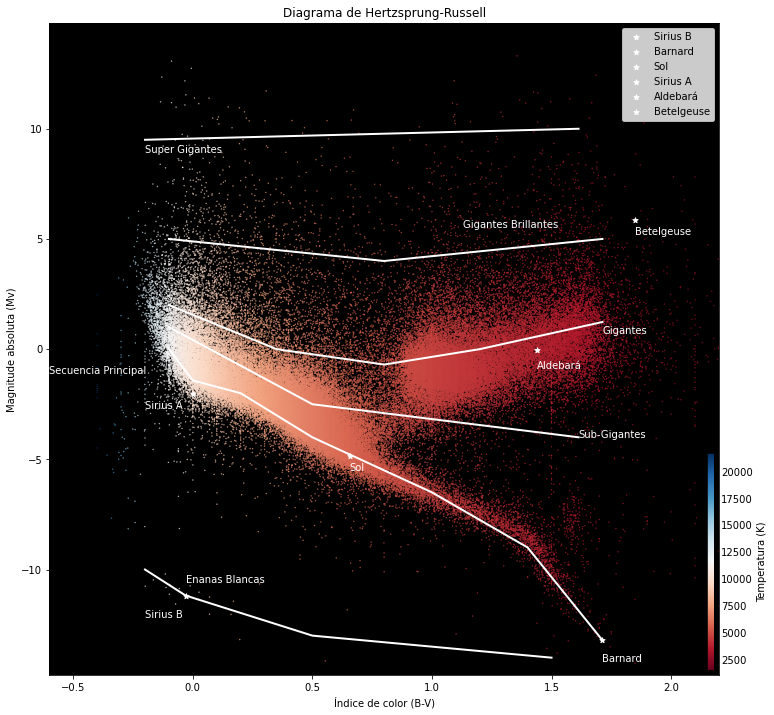

In [3]:
df = data_star[data_star["Plx"]>0.000001] #Filtrar el Paralaje
df = df.dropna(subset = ["B-V"]) #Eliminar los datos vacios de la columna B-V
bmv = np.array(df["B-V"],dtype=float) #Convertir en Array de Numeros Reales
m = np.array(df["Vmag"],dtype=float) #Convertir en Array de Numeros Reales
p = np.array(df["Plx"],dtype=float) #Convertir en Array de Numeros Reales
d = 1/p*1000 # Calcular la Distancia con Paralaje en milisegundos de arco
t = np.array(4600 * (1/(0.92 * bmv + 1.7) + 1/(0.92 * bmv + 0.62))) #Calcular la Temperatura
M=m-5*np.log10(d/10) #Calcular la magnitud absoluta
secuencia_principal_x = [-0.1,0, .2,0.5, 1, 1.4, 1.713] # Linea que muestra el flujo de movimiento en el grafico de las estrellas a lo largo de su vida.
secuencia_principal_y = [0,-1.42, -2, -4, -6.5, -9, -13.21] # Linea que muestra el flujo de movimiento en el grafico de las estrellas a lo largo de su vida.
EnanasBlancas_x = [-0.2, -0.03, 0.5,1.5] # Linea que muestra el flujo de movimiento en el grafico de las estrellas a lo largo de su vida.
EnanasBlancas_y = [-10, -11.18,-13, -14] # Linea que muestra el flujo de movimiento en el grafico de las estrellas a lo largo de su vida.
SubGigantes_x = [-0.1, .5 ,1.613] # Linea que muestra el flujo de movimiento en el grafico de las estrellas a lo largo de su vida.
SubGigantes_y = [1, -2.5 , -4] # Linea que muestra el flujo de movimiento en el grafico de las estrellas a lo largo de su vida.
SuperGigantes_x = [-0.2, 1.613] # Linea que muestra el flujo de movimiento en el grafico de las estrellas a lo largo de su vida.
SuperGigantes_y = [9.5, 10] # Linea que muestra el flujo de movimiento en el grafico de las estrellas a lo largo de su vida.
Gigantes_x = [-0.1,0.35 ,0.8 ,1.2 ,1.713] # Linea que muestra el flujo de movimiento en el grafico de las estrellas a lo largo de su vida.
Gigantes_y = [2,0 ,-0.7, 0,1.231] # Linea que muestra el flujo de movimiento en el grafico de las estrellas a lo largo de su vida.
GigantesBrillantes_x = [-0.1,0.8 ,1.713] # Linea que muestra el flujo de movimiento en el grafico de las estrellas a lo largo de su vida.
GigantesBrillantes_y = [5, 4 ,5] # Linea que muestra el flujo de movimiento en el grafico de las estrellas a lo largo de su vida.
fig, ax = plt.subplots(figsize=(12, 12)) # hacer el recuadro en el que se hara la grafica
scatter = ax.scatter(bmv, -M, c= t,  cmap =  "RdBu", marker = '.', s = .5) # Grafica los datos
ax.scatter(x = -0.03, y = -11.18, c = "white", s = 30, marker= "*" ,label = "Sirius B") # Marca el punto de posicion de una estrella
ax.scatter(x = 1.713, y = -13.21, c = "white", s = 30, label = "Barnard", marker= "*") # Marca el punto de posicion de una estrella
ax.scatter(x = 0.656, y = -4.83, c = "white", s = 30, label = "Sol", marker= "*") # Marca el punto de posicion de una estrella
ax.scatter(x = 0, y = -2.02, c = "white", s = 30, label = "Sirius A",marker= "*") # Marca el punto de posicion de una estrella
ax.scatter(x = 1.44, y = -0.031, c = "white", s = 30, label = "Aldebará", marker= "*") # Marca el punto de posicion de una estrella
ax.scatter(x = 1.85, y = 5.85, c = "white", s = 30, label = "Betelgeuse", marker= "*") # Marca el punto de posicion de una estrella
plt.xlabel("Índice de color (B-V)") # Cambia el nombre de la variable en el eje x
plt.ylabel("Magnitude absoluta (Mv)") #  Cambia el nombre de la variable en el eje y
plt.title("Diagrama de Hertzsprung-Russell") # titulo del grafico
plt.legend() # Coloca el Registro donde se ven los puntos que se usan y su color (No es tan necesario en este grafico)
plt.xlim(-0.6, 2.2) # Establece un limite de datos, ya que de lo contrario la grafica seria muy grande con datos que no aportan informacion
plt.ylim(-14.8, 14.8) # Establece un limite de datos, ya que de lo contrario la grafica seria muy grande con datos que no aportan informacion
plt.plot(secuencia_principal_x, secuencia_principal_y, c = "white", linewidth = 2) # Grafica Linea que muestra el flujo de movimiento en el grafico de las estrellas a lo largo de su vida.
plt.plot(EnanasBlancas_x, EnanasBlancas_y, c = "white", linewidth = 2) # Grafica Linea que muestra el flujo de movimiento en el grafico de las estrellas a lo largo de su vida.
plt.plot(SubGigantes_x, SubGigantes_y, c = "white", linewidth = 2) # Grafica Linea que muestra el flujo de movimiento en el grafico de las estrellas a lo largo de su vida.
plt.plot(Gigantes_x, Gigantes_y, c = "white", linewidth = 2) # Grafica Linea que muestra el flujo de movimiento en el grafico de las estrellas a lo largo de su vida.
plt.plot(SuperGigantes_x, SuperGigantes_y, c = "white", linewidth = 2) # Grafica Linea que muestra el flujo de movimiento en el grafico de las estrellas a lo largo de su vida.
plt.plot(GigantesBrillantes_x, GigantesBrillantes_y, c = "white", linewidth = 2) # Grafica Linea que muestra el flujo de movimiento en el grafico de las estrellas a lo largo de su vida.
plt.annotate("Super Gigantes", (-0.2, 8.9), c = "white") # Anota el nombre de Estrellas o el flujo Cumulos estelares del diagrama de HR
plt.annotate("Gigantes Brillantes", (1.13, 5.5), c = "white") # Anota el nombre de Estrellas o el flujo Cumulos estelares del diagrama de HR
plt.annotate("Secuencia Principal", (-0.6, -1.1), color = "white") # Anota el nombre de Estrellas o el flujo Cumulos estelares del diagrama de HR
plt.annotate("Enanas Blancas", (-0.03, -10.6), color = "white") # Anota el nombre de Estrellas o el flujo Cumulos estelares del diagrama de HR
plt.annotate("Sub-Gigantes", (1.613, -4), color = "white") # Anota el nombre de Estrellas o el flujo Cumulos estelares del diagrama de HR
plt.annotate("Gigantes", (1.713, 0.7), color = "white") # Anota el nombre de Estrellas o el flujo Cumulos estelares del diagrama de HR
plt.annotate("Sol", (0.656, -5.5), color = "white") # Anota el nombre de Estrellas o el flujo Cumulos estelares del diagrama de HR
plt.annotate("Betelgeuse", (1.85, 5.2), color = "white") # Anota el nombre de Estrellas o el flujo Cumulos estelares del diagrama de HR
plt.annotate("Aldebará", (1.44, -0.9), color = "white") # Anota el nombre de Estrellas o el flujo Cumulos estelares del diagrama de HR
plt.annotate("Barnard", (1.713, -14.2), color = "white") # Anota el nombre de Estrellas o el flujo Cumulos estelares del diagrama de HR
plt.annotate("Sirius B", (-0.2,-12.2), color = "white") # Anota el nombre de Estrellas o el flujo Cumulos estelares del diagrama de HR
plt.annotate("Sirius A", (-0.2, -2.72), c = "white") # Anota el nombre de Estrellas o el flujo Cumulos estelares del diagrama de HR
Color_BC = plt.gca() # Fondo del grafico Negro
Color_BC.set_facecolor("black") # Fondo del grafico Negro
Color_BC.patch.set_alpha(1) # Fondo del grafico Negro
cbaxes = inset_axes(ax, width="1%", height="33.3%", loc='lower right') # coloca el registro de la paleta de colores segun el hue indicado
cbar = fig.colorbar(scatter, cax=cbaxes) # coloca el registro de la paleta de colores segun el hue indicado
cbar.set_label('Temperatura (K)') # Nombre de el CBAR

### 2.1 Magnitud absoluta y Tipos de Estrella

 las estrellas más brillantes (con magnitud absoluta más baja) son las más grandes y calientes, mientras que las estrellas más débiles (con magnitud absoluta más alta) son las más pequeñas y frías.

En el diagrama de Hertzprung-Russell, las enanas rojas (Tipo 0) se encuentran en la parte inferior izquierda del diagrama, ya que son estrellas frías y con baja luminosidad. A medida que aumenta la temperatura, las enanas marrones (Tipo 1) se encuentran en una posición intermedia, las enanas blancas (Tipo 2) se encuentran en la parte superior izquierda del diagrama, ya que son estrellas calientes y con baja luminosidad.

La secuencia principal (Tipo 3) se encuentra en el centro del diagrama, ya que son estrellas con una amplia variedad de temperaturas y luminosidades. A medida que aumenta la luminosidad, las gigantes (Tipo 4) se encuentran en la parte inferior derecha del diagrama, mientras que las hiper gigantes (Tipo 5) se encuentran en la parte superior derecha, ya que son estrellas muy calientes y con alta luminosidad.

Es importante mencionar que estos tipos de estrellas se ubican en diferentes puntos del diagrama de Hertzprung-Russell debido a su edad y masa. Las enanas rojas y marrones son estrellas viejas y con baja masa, mientras que las secuencia principal, gigantes y hiper gigantes son estrellas jóvenes y con alta masa. Estas diferencias en edad y masa afectan su temperatura y luminosidad, lo que a su vez determina su posición en el diagrama de Hertzprung-Russell.

En resumen, la relación inversa entre la magnitud absoluta y el tipo de estrella se refleja en el diagrama de Hertzprung-Russell, donde las estrellas más brillantes (con magnitud absoluta más baja) se encuentran en la parte derecha del diagrama, mientras que las estrellas más débiles (con magnitud absoluta más alta) se encuentran en la parte izquierda del diagrama. Esto se debe a las diferencias en edad y masa de las estrellas, que afectan su temperatura y luminosidad.

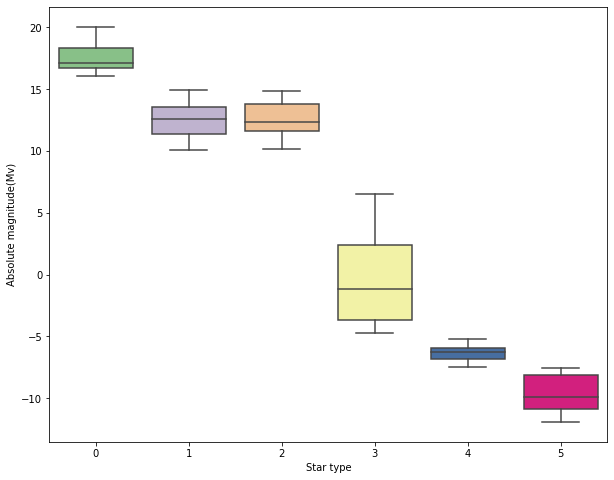

In [4]:
Mv_type = pd.concat([data_star2["Star type"], data_star2["Absolute magnitude(Mv)"]], axis=1)
fig = plt.figure(figsize=(10, 8))
axes = sns.boxplot(data= Mv_type, x= "Star type", y="Absolute magnitude(Mv)", palette= "Accent")

### 2.2. Color, Temperatura y clases Espectrales


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Red'),
  Text(1, 0, 'BlueWhite'),
  Text(2, 0, 'White'),
  Text(3, 0, 'Yellowish-White'),
  Text(4, 0, 'Pale-yellow-orange'),
  Text(5, 0, 'Blue'),
  Text(6, 0, 'Whitish'),
  Text(7, 0, 'yellow-White'),
  Text(8, 0, 'Orange'),
  Text(9, 0, 'White-Yellow'),
  Text(10, 0, 'yellowish'),
  Text(11, 0, 'Yellowish'),
  Text(12, 0, 'Orange-Red')])

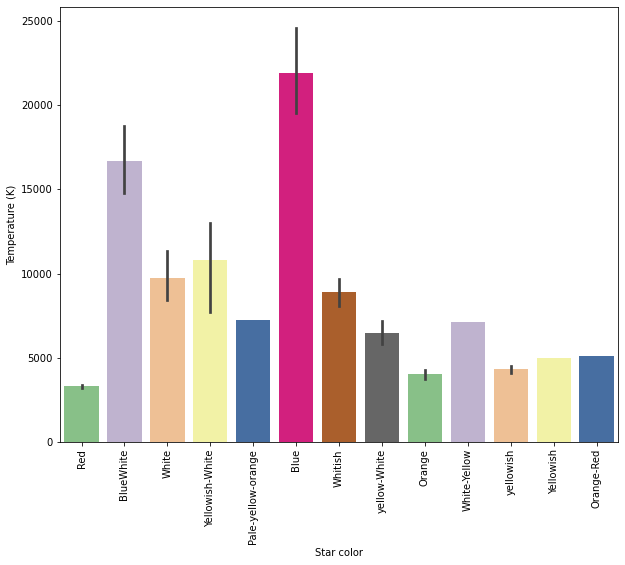

In [5]:
data_star2["Star color"] = data_star2["Star color"].apply(lambda x: re.sub(r"\s", "-", x))
data_star2["Star color"] = data_star2["Star color"].str.replace("Blue-white", "Blue-White")
data_star2["Star color"] = data_star2["Star color"].str.replace("white", "White")
data_star2["Star color"] = data_star2["Star color"].str.replace("Blue-", "Blue")
data_star2["Star color"] = data_star2["Star color"].str.replace("BlueWhite-", "BlueWhite")
data_star2["Star color"].value_counts(normalize=False, sort=True)

Mv_color = pd.concat([data_star2["Star color"], data_star2["Temperature (K)"]], axis=1)
fig = plt.figure(figsize=(10, 8))
axes = sns.barplot(data= Mv_color, x= "Star color", y="Temperature (K)", palette= "Accent")
plt.xticks(rotation=90)

La relación entre el color y la temperatura de las estrellas se conoce como la Ley de Wien de la radiación. Esta ley establece que la longitud de onda de la radiación electromagnética emitida con mayor intensidad por un cuerpo negro aumenta a medida que disminuye su temperatura.

En otras palabras, a medida que la temperatura de una estrella aumenta, su radiación se mueve hacia longitudes de onda más cortas, es decir, hacia el ultravioleta, el azul y el verde. A medida que la temperatura de una estrella disminuye, su radiación se mueve hacia longitudes de onda más largas, es decir, hacia el infrarrojo, el rojo y el naranja.

Por lo tanto, una estrella caliente aparecerá azul o blanca, mientras que una estrella fría aparecerá roja. Esto se debe a que los átomos y moléculas en una estrella caliente tienen una mayor velocidad de movimiento, lo que permite que emiten luz en un rango más amplio de longitudes de onda. En cambio, los átomos y moléculas en una estrella fría tienen una menor velocidad de movimiento, lo que significa que emiten luz principalmente en longitudes de onda más largas.

Por otro lado, la clasificación espectral de las estrellas se basa en el análisis de los espectros de las estrellas, y se utiliza para determinar la temperatura, el tamaño, la masa, la densidad, la velocidad de rotación y otros parámetros de las estrellas. La clasificación espectral se divide en 7 tipos conocidos como O, B, A, F, G, K, M, cada una de ellas representando un rango de temperatura. Por ejemplo, las estrellas de tipo O son las más calientes y las de tipo M las más frías.


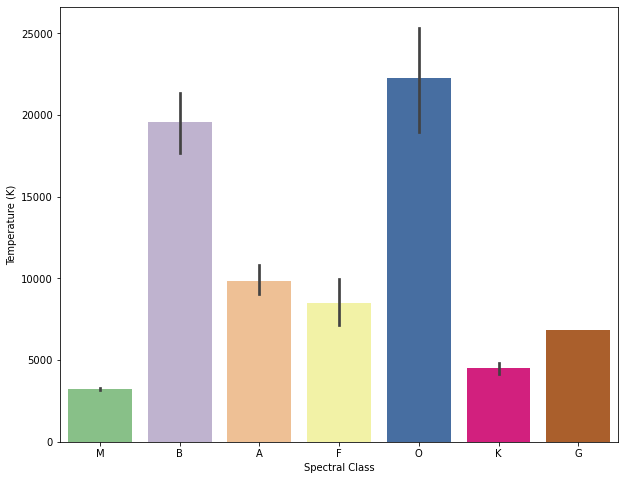

In [6]:

Mv_sptype = pd.concat([data_star2["Spectral Class"], data_star2["Temperature (K)"]], axis=1)
fig = plt.figure(figsize=(10, 8))
axes = sns.barplot(data= Mv_sptype, x= "Spectral Class", y="Temperature (K)", palette= "Accent")

### 2.3 Luminosidad, Magnitud absoluta y Temperatura

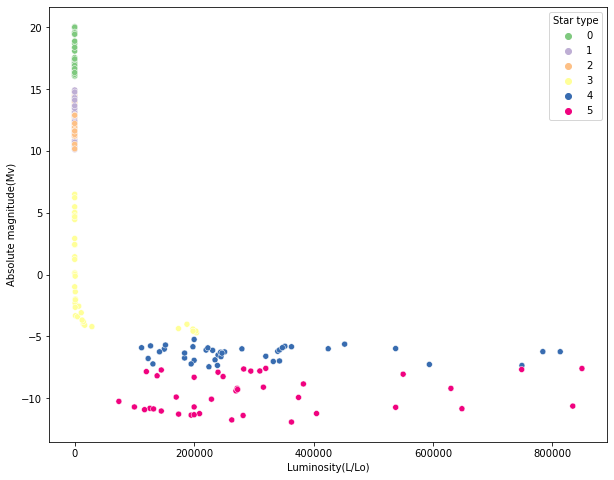

In [7]:
fig = plt.figure(figsize=(10, 8))
axes = sns.scatterplot(data= data_star2, x= "Luminosity(L/Lo)", y="Absolute magnitude(Mv)", hue="Star type", palette= "Accent")

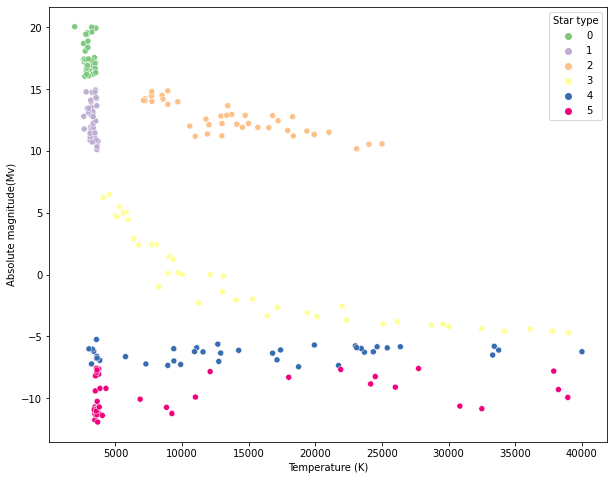

In [8]:
fig = plt.figure(figsize=(10, 8))
axes = sns.scatterplot(data= data_star2, x= "Temperature (K)", y="Absolute magnitude(Mv)", hue="Star type", palette= "Accent")

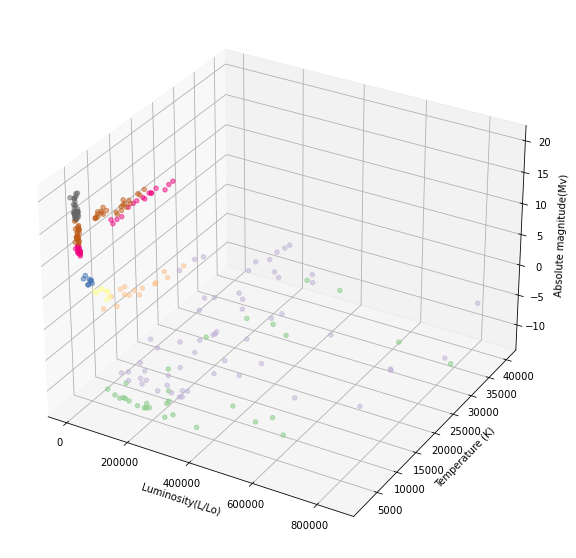

In [9]:
def scatter_plot_3d(serie1, serie2, serie3):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(serie1, serie2, serie3, c = serie3, cmap= "Accent" , s=20, alpha=.5)
    ax.set_xlabel('Luminosity(L/Lo)')
    ax.set_ylabel('Temperature (K)')
    ax.set_zlabel('Absolute magnitude(Mv)')
    plt.show()


scatter_plot_3d(data_star2["Luminosity(L/Lo)"], data_star2["Temperature (K)"], data_star2["Absolute magnitude(Mv)"])

### 2.4 Radio, Luminosidad relativa y Magnitud absoluta

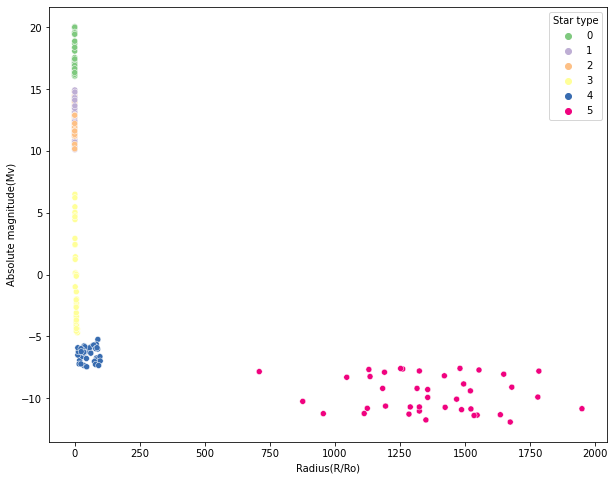

In [10]:
fig = plt.figure(figsize=(10, 8))
axes = sns.scatterplot(data= data_star2, y= "Absolute magnitude(Mv)", x = "Radius(R/Ro)", hue = "Star type", palette="Accent")

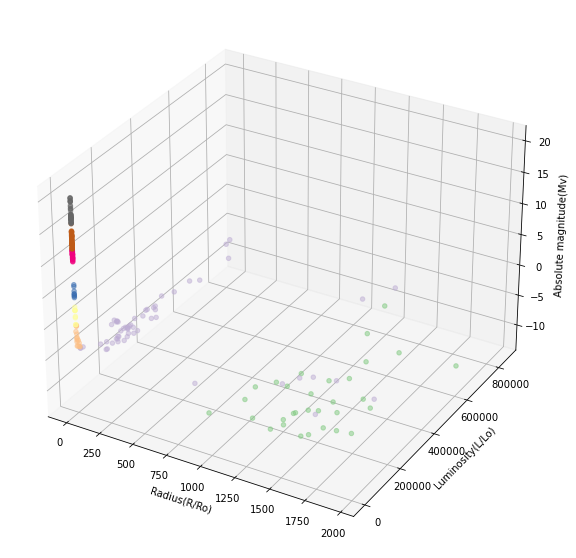

In [11]:
def scatter_plot_3d(serie1, serie2, serie3):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(serie1, serie2, serie3, c = serie3, cmap= "Accent" , s=20, alpha=.5)
    ax.set_xlabel('Radius(R/Ro)')
    ax.set_ylabel('Luminosity(L/Lo)')
    ax.set_zlabel('Absolute magnitude(Mv)')
    plt.show()


scatter_plot_3d(data_star2["Radius(R/Ro)"], data_star2["Luminosity(L/Lo)"], data_star2["Absolute magnitude(Mv)"])

# Clasificacion de estrellas en distintas etapas evolutivas

In [12]:
Hipparcos = Hipparcos.filter(["Vmag", "Plx", "B-V"])
Hipparcos["Distance"] = (1/Hipparcos["Plx"])*1000 #Calcular Distancia
Hipparcos["Absolute Magnitude"] =  Hipparcos["Vmag"] - 5 * np.log10(Hipparcos["Distance"]) + 5   #Calcular magnitud absoluta
Hipparcos["Teff"] = np.array(4600 * (1/(0.92 * Hipparcos["B-V"] + 1.7) + 1/(0.92 * Hipparcos["B-V"] + 0.62))) # Calcular Temperatura efectiva

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
Hipparcos = Hipparcos.dropna()
Hipparcos = Hipparcos.reset_index()

In [14]:
Hipparcos.drop(columns="index", inplace=True)

In [15]:
Hipparcos["SpClass"] = pd.cut(Hipparcos["Teff"],
 bins= [1000, 3500, 5300, 6000,7500, 10000, 20000, 40000],
 labels=["M", "K", "G", "F", "A", "B", "O"])

In [16]:
Hipparcos["Star Type"] = pd.cut(Hipparcos["Absolute Magnitude"],
bins= [-15, -10, -5, 0, 4, 15],
labels= [5, 4, 3, 2, 1])

In [17]:


conditions = [((Hipparcos["SpClass"]=="M") & (Hipparcos["Star Type"]==1)), 
              ((Hipparcos["SpClass"]=="K") & (Hipparcos["Star Type"]==1)), 
              ((Hipparcos["SpClass"]=="G") & (Hipparcos["Star Type"]==1)), 
              ((Hipparcos["SpClass"]=="F") & (Hipparcos["Star Type"]==1)),
              ((Hipparcos["SpClass"]=="A") & (Hipparcos["Star Type"]==1)),
              ((Hipparcos["SpClass"]=="B") & (Hipparcos["Star Type"]==1)),
              ((Hipparcos["SpClass"]=="O") & (Hipparcos["Star Type"]==1)),
              ((Hipparcos["SpClass"]=="M") & (Hipparcos["Star Type"]==2)), 
              ((Hipparcos["SpClass"]=="K") & (Hipparcos["Star Type"]==2)), 
              ((Hipparcos["SpClass"]=="G") & (Hipparcos["Star Type"]==2)), 
              ((Hipparcos["SpClass"]=="F") & (Hipparcos["Star Type"]==2)),
              ((Hipparcos["SpClass"]=="A") & (Hipparcos["Star Type"]==2)),
              ((Hipparcos["SpClass"]=="B") & (Hipparcos["Star Type"]==2)),
              ((Hipparcos["SpClass"]=="O") & (Hipparcos["Star Type"]==2)),
              ((Hipparcos["SpClass"]=="M") & (Hipparcos["Star Type"]==3)), 
              ((Hipparcos["SpClass"]=="K") & (Hipparcos["Star Type"]==3)), 
              ((Hipparcos["SpClass"]=="G") & (Hipparcos["Star Type"]==3)), 
              ((Hipparcos["SpClass"]=="F") & (Hipparcos["Star Type"]==3)),
              ((Hipparcos["SpClass"]=="A") & (Hipparcos["Star Type"]==3)),
              ((Hipparcos["SpClass"]=="B") & (Hipparcos["Star Type"]==3)),
              ((Hipparcos["SpClass"]=="O") & (Hipparcos["Star Type"]==3))]

choices = [
    'Secuencia Principal',
    'Secuencia Principal',
    'Secuencia Principal',
    'Secuencia Principal',
    'Enanas Blancas',
    'Enanas Blancas',
    'Enanas Blancas',
    'Gigantes Rojas',
    'Gigantes Rojas',
    'Secuencia Principal',
    'Secuencia Principal',
    'Secuencia Principal',
    'Secuencia Principal',
    'Secuencia Principal',
    'Gigantes Rojas',
    'Gigantes Rojas',
    'Secuencia Principal',
    'Secuencia Principal',
    'Secuencia Principal',
    'Secuencia Principal',
    'Secuencia Principal'
    
]

Hipparcos['Epochs'] = np.select(conditions, choices, default='HiperGigantes')


In [18]:
Hipparcos = Hipparcos.replace([np.inf, -np.inf], np.nan)
Hipparcos = Hipparcos.dropna()


In [19]:
Hipparcos

,Vmag,Plx,B-V,Distance,Absolute Magnitude,Teff,SpClass,Star Type,Epochs
0,9.10,3.54,0.482,282.485876,1.845016,6471.667826,F,2,Secuencia Principal
1,9.27,21.90,0.999,45.662100,5.972221,4745.140425,K,1,Secuencia Principal
2,6.61,2.81,-0.019,355.871886,-1.146468,10368.595588,B,3,Secuencia Principal
3,8.06,7.75,0.370,129.032258,2.506509,7044.130880,F,2,Secuencia Principal
4,8.55,2.87,0.902,348.432056,0.839409,4991.060700,K,2,Gigantes Rojas
...,...,...,...,...,...,...,...,...,...
112862,6.99,1.92,1.595,520.833333,-1.593494,3655.993639,K,3,Gigantes Rojas
112863,8.23,10.63,0.639,94.073377,3.362666,5818.920292,G,2,Secuencia Principal
112864,7.59,5.00,0.999,200.000000,1.084850,4745.140425,K,2,Gigantes Rojas
112865,9.20,19.22,0.698,52.029136,5.618767,5608.544902,G,1,Secuencia Principal


In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

# Crea un objeto LabelEncoder
le = LabelEncoder()

# Transforma las etiquetas categóricas a valores numéricos únicos
Hipparcos.Epochs = le.fit_transform(Hipparcos.Epochs)
Hipparcos.SpClass = le.fit_transform(Hipparcos.SpClass)

In [21]:
Target = Hipparcos.iloc[:, 8]
Hipparcos_T = Hipparcos.iloc[:, :-1]

In [22]:
Standar = StandardScaler()
Hipparcos_T = Standar.fit_transform(Hipparcos_T)

In [23]:
Data = pd.DataFrame(Hipparcos_T, columns= Hipparcos.columns[:8])

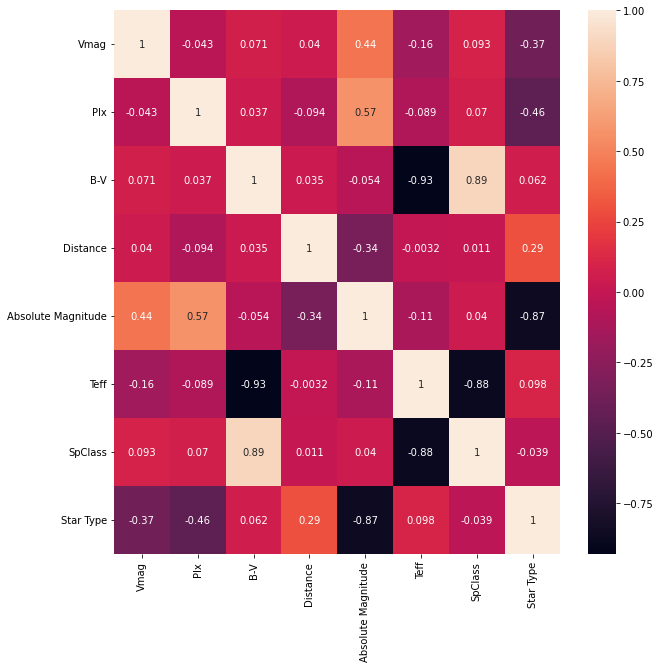

In [24]:
Corrmat = Data.corr()
fig= plt.figure(figsize=(10, 10))
matrizC = sns.heatmap(Corrmat, annot=True)

In [25]:
rfc = RandomForestClassifier(random_state = 42)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(Data, Target, random_state= 42)

In [27]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
#Utilizar la matriz de confusión 
y_train_pred = cross_val_predict(rfc, X_train, y_train, cv=3)
conf_mz = confusion_matrix(y_train,y_train_pred)

In [29]:
print(conf_mz)

[[  118     0     0     1]
 [    0 29952     0     0]
 [    0     0   656     0]
 [    0     0     0 53889]]


In [30]:
#Utilizar la matriz de confusión 
y_test_pred = cross_val_predict(rfc, X_test, y_test, cv=3)
conf_mz = confusion_matrix(y_test,y_test_pred)

In [31]:
print(conf_mz)

[[   31     0     0     2]
 [    0  9953     0     0]
 [    0     0   237     0]
 [    0     0     0 17983]]


In [32]:
#Calcular la precisión y recall con el nuevo clasificador 
p = precision_score(y_train,y_train_pred,  average= "macro")
r = recall_score(y_train,y_train_pred,  average= "macro")
p,r

(0.9999953609203934, 0.9978991596638656)